# Visualização dos microdados das matriculas da rede municipal de educação do município de SP

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from branca.element import Template, MacroElement

sns.set(rc={'figure.figsize':(20,10)})

In [2]:
anos = ['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012']
tam = 5000

for i, ano in enumerate(anos):
    if ano == '2020' or ano == '2019':
        tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_' + ano + '.csv', encoding = "ISO-8859-1", sep = ';')
        # tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_' + ano + '.csv', encoding = "ISO-8859-1", sep = ';', chunksize = tam)
    else:
        tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_' + ano + '.csv', encoding = "ISO-8859-1", sep = '|')
        # tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_' + ano + '.csv', encoding = "ISO-8859-1", sep = '|', chunksize = tam)

    # for chunk in tabela:
    #     y = pd.DataFrame(chunk)
    #     break
    
    y = pd.DataFrame(tabela)
    print('Ano: ', ano, '\nTamanho tabela sem o processamento: ', y.shape)

    # Limpeza dados
    if 'CD_INEP_ALUNO' not in y.columns:
        y['CD_INEP_ALUNO'] = ''

    if 'Hora_Inicio' not in y.columns:
        y['Hora_Inicio'] = ''

    if 'DEF_AUTISMO' in y.columns:
        y = y.rename(columns={'DEF_AUTISMO': 'DEF__AUTISMO'})

    if 'DEF_SURDEZ_LEVE' in y.columns:
        y = y.rename(columns={'DEF_SURDEZ_LEVE': 'DEF__SURDEZ_LEVE'})

    if 'DEF_SURDEZ_SEV' in y.columns:
        y = y.rename(columns={'DEF_SURDEZ_SEV': 'DEF__SURDEZ_SEV'})

    if 'DEF_INTELECT' in y.columns:
        y = y.rename(columns={'DEF_INTELECT': 'DEF__INTELECT'})

    if 'DEF_MULTIPLA' in y.columns:
        y = y.rename(columns={'DEF_MULTIPLA': 'DEF__MULTIPLA'})

    if 'DEF_CEGUEIRA' in y.columns:
        y = y.rename(columns={'DEF_CEGUEIRA': 'DEF__CEGUEIRA'})

    if 'DEF_BAIXA_VISAO' in y.columns:
        y = y.rename(columns={'DEF_BAIXA_VISAO': 'DEF__BAIXA_VISAO'})

    if 'DEF_SURDO_CEG' in y.columns:
        y = y.rename(columns={'DEF_SURDO_CEG': 'DEF__SURDO_CEG'})

    if 'DEF_TRANST_DES_INF' in y.columns:
        y = y.rename(columns={'DEF_TRANST_DES_INF': 'DEF__TRANST_DES_INF'})

    if 'DEF_SINDR_ASPER' in y.columns:
        y = y.rename(columns={'DEF_SINDR_ASPER': 'DEF__SINDR_ASPER'})

    if 'DEF_SINDR_RETT' in y.columns:
        y = y.rename(columns={'DEF_SINDR_RETT': 'DEF__SINDR_RETT'})

    if 'DEF_FIS_N_CADEIR' in y.columns:
        y = y.rename(columns={'DEF_FIS_N_CADEIR': 'DEF__FIS_N_CADEIR'})

    if 'DEF_FIS_CADEIR' in y.columns:
        y = y.rename(columns={'DEF_FIS_CADEIR': 'DEF__FIS_CADEIR'})

    if 'DEF_N_POSSUI' in y.columns:
        y = y.rename(columns={'DEF_N_POSSUI': 'DEF__N_POSSUI'})

    labelsDeficiencia = ['NEE_ALT_HAB', 'DEF__AUTISMO', 'DEF__SURDEZ_LEVE', 'DEF__SURDEZ_SEV', 'DEF__INTELECT', 'DEF__MULTIPLA', 'DEF__CEGUEIRA', 'DEF__BAIXA_VISAO', 'DEF__SURDO_CEG', 'DEF__TRANST_DES_INF', 'DEF__SINDR_ASPER', 'DEF__SINDR_RETT', 'DEF__FIS_N_CADEIR', 'DEF__FIS_CADEIR', 'DEF__N_POSSUI']
    
    for label in labelsDeficiencia:
        y[label] = pd.to_numeric(y[label], errors="coerce")

    if ano == '2020':
        for idadeReal in y['IDADE_ALUNO_ANO_CIVIL'].unique():
            y.loc[y['IDADE_ALUNO_ANO_CIVIL'] == idadeReal, 'IDADE_ALUNO_ANO_CIVIL'] = int(idadeReal.split(',')[0])
    else:
        y['IDADE_ALUNO_ANO_CIVIL'] = pd.to_numeric(y['IDADE_ALUNO_ANO_CIVIL'], errors="coerce")

    y['IDADE_ALUNO_ANO_CIVIL'] = pd.to_numeric(y['IDADE_ALUNO_ANO_CIVIL'], errors="coerce")

    y['[0-3]'] = 0
    y['[3-6]'] = 0
    y['[6-9]'] = 0
    y['[9-12]'] = 0
    y['[12-15]'] = 0
    y['[15-18]'] = 0
    y['[18+]'] = 0

    y.loc[y['IDADE_ALUNO_ANO_CIVIL'] <= 3, '[0-3]'] = 1
    y.loc[(y['IDADE_ALUNO_ANO_CIVIL'] > 3) & (y['IDADE_ALUNO_ANO_CIVIL'] <= 6), '[3-6]'] = 1
    y.loc[(y['IDADE_ALUNO_ANO_CIVIL'] > 6) & (y['IDADE_ALUNO_ANO_CIVIL'] <= 9), '[6-9]'] = 1
    y.loc[(y['IDADE_ALUNO_ANO_CIVIL'] > 9) & (y['IDADE_ALUNO_ANO_CIVIL'] <= 12), '[9-12]'] = 1
    y.loc[(y['IDADE_ALUNO_ANO_CIVIL'] > 12) & (y['IDADE_ALUNO_ANO_CIVIL'] <= 15), '[12-15]'] = 1
    y.loc[(y['IDADE_ALUNO_ANO_CIVIL'] > 15) & (y['IDADE_ALUNO_ANO_CIVIL'] <= 18), '[15-18]'] = 1
    y.loc[y['IDADE_ALUNO_ANO_CIVIL'] > 18, '[18+]'] = 1

    y.loc[y['DESC_CICLO_ENSINO'].isnull(), 'DESC_CICLO_ENSINO'] = 'NAO INFORMADO'

    y = y.drop_duplicates(subset='CD_ALUNO_SME')

    y = y.drop(columns=['DESC_TIPO_PROGRAMA', 'CD_INEP_ALUNO', 'CD_PARECER_CONCL_FIN', 'DESC_PARECER_CONCL_FIN', 'DESC_TIPO_PROGRAMA', 'Hora_Inicio', 'CD_UNIDADE_EDUCACAO', 'NOME_DISTRITO', 'CD_SETOR', 'TIPO_ESCOLA', 'DRE', 'SITUACAO_ESCOLA', 'DESC_TURNO', 'DESC_SERIE', 'MODALIDADE', 'MODALIDADE_SEGMENTO', 'TURMA_ESCOL', 'NOME_TURMA', 'HORA_IN_TURMA', 'HORA_FIM_TURMA', 'DESC_PERIODICIDADE_TURMA', 'DESC_ETAPA_ENSINO', 'DESC_CICLO_ENSINO', 'DESC_TIPO_TURMA', 'DESC_TIPO_PROGRAMA', 'DUR_DIA_TURMA', 'DUR_DIA_HORA', 'DUR_DIA_MIN', 'DUR_SEMAN_TURMA', 'DUR_SEM_HORA', 'DUR_SEM_MIN', 'QTD_DIAS_SEMAN_TURMA', 'X_SEMANA', 'SEG', 'TER', 'QUA', 'SEX', 'SAB', 'DOM', 'CD_INEP_ALUNO', 'DESC_RACA_COR', 'CD_PAIS_NASC', 'DESC_PAIS_NASC', 'CD_MUN_NASC', 'DESC_MUN_NASC', 'DESC_UF_NASC', 'ANO_SIT_MAT'])

    y = y.dropna(how="any", axis=0)
    
    print('Tamanho tabela com o processamento: ', y.shape, end='\n\n')

    if i == 0:
        y.to_csv('data/Matriculas.csv', sep=';', index=False, line_terminator='')
    else:
        y.to_csv('data/Matriculas.csv', sep=';', index=False, line_terminator='', mode='a', header=False)

Ano:  2019 
Tamanho tabela sem o processamento:  (1809796, 95)
Tamanho tabela com o processamento:  (1253292, 60)

Ano:  2018 
Tamanho tabela sem o processamento:  (1756527, 95)
Tamanho tabela com o processamento:  (1246264, 60)



C:\ferramentass\Python3.9\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (20,22,24,28,95) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Ano:  2017 
Tamanho tabela sem o processamento:  (1722560, 96)
Tamanho tabela com o processamento:  (1180702, 60)



C:\ferramentass\Python3.9\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Ano:  2016 
Tamanho tabela sem o processamento:  (1651243, 96)
Tamanho tabela com o processamento:  (1164292, 60)

Ano:  2015 
Tamanho tabela sem o processamento:  (1588623, 96)
Tamanho tabela com o processamento:  (1119693, 60)



C:\ferramentass\Python3.9\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (28,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Ano:  2014 
Tamanho tabela sem o processamento:  (1496726, 96)
Tamanho tabela com o processamento:  (1093911, 60)

Ano:  2013 
Tamanho tabela sem o processamento:  (1937973, 96)
Tamanho tabela com o processamento:  (1106193, 60)

Ano:  2012 
Tamanho tabela sem o processamento:  (1959572, 96)
Tamanho tabela com o processamento:  (1106278, 60)



In [79]:
tabela = pd.read_csv('data/Matriculas.csv', encoding = "ISO-8859-1", sep = ';')
y = pd.DataFrame(tabela)

anos = ['2020', '2019', '2018', '2017', '2016']

for idx, ano in enumerate(anos):
    escolas = pd.read_csv('data/Escolas_' + ano + '.csv', encoding = "ISO-8859-1", sep = ';')
    escolas = pd.DataFrame(escolas)

    tabela = pd.DataFrame(columns=['Ano', 'Cod_inep', 'Nome', 'Latitude', 'Longitude', 'Qtd_matriculas'])

    indice = 0
    c = Counter(list(zip(y['CD_INEP_ESCOLA'])))

    escolas.rename(columns={'codinep': 'CODINEP'}, inplace=True)

    for codigoEscola in y['CD_INEP_ESCOLA'].unique():
        for a in escolas.loc[escolas['CODINEP'] == codigoEscola].values:
            error = False

            if len(str(a[31]).split('.')) > 2 and len(str(a[32]).split('.')) > 2:
                latitude = ''
                longitude = ''

                for idx, n in enumerate(str(a[31]).split('.')):
                    latitude += n
                    if idx == 0: latitude += '.'

                for idx, n in enumerate(str(a[32]).split('.')):
                    longitude += n
                    if idx == 0: longitude += '.'

                latitude = float(latitude)
                longitude = float(longitude)
            else:
                error = True

            if not error:
                value = 0

                for data in c.items():
                    if data[0][0] == codigoEscola:
                        value = data[1]

                tabela.loc[indice] = list([int(ano), a[19], a[3], latitude, longitude, value])
                indice += 1

    if idx == 0:
        tabela.to_csv('data/Localidade_escolas.csv', sep=';', index=False, line_terminator='')
    elif idx != 0:
        tabela.to_csv('data/Localidade_escolas.csv', sep=';', index=False, line_terminator='', mode='a', header=False)

In [80]:
tabela = pd.read_csv('data/Matriculas.csv', encoding = "ISO-8859-1", sep = ';')
y = pd.DataFrame(tabela)


In [82]:
anLetivo = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012]
dados = []

for an in anLetivo:
    data = y.loc[y['AN_LETIVO'] == an]

    for id_inep in data['CD_INEP_ESCOLA'].unique():
        escola = data.loc[data['CD_INEP_ESCOLA'] == id_inep]

        dados.append([an, id_inep, escola['NOME_ESCOLA'].unique()[0], escola.shape[0]])

tabela = pd.DataFrame(dados, columns=['Ano', 'Cod_inep', 'Nome', 'Qtd_matriculas'])
tabela.to_csv('data/Matriculas_escolas.csv', sep=';', index=False, line_terminator='')

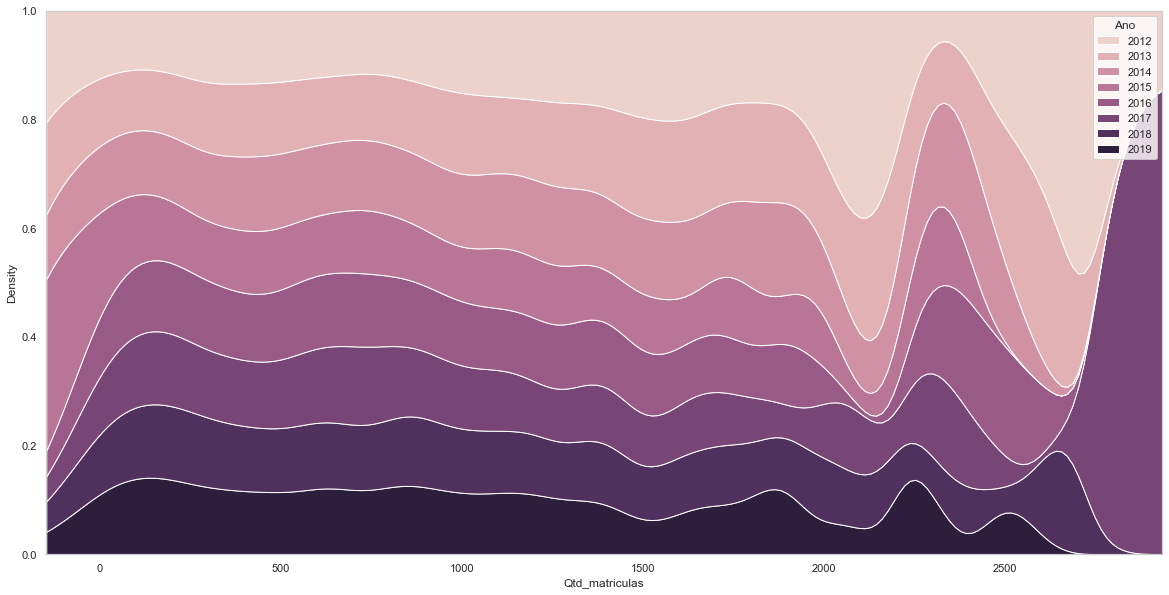

In [84]:
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# stacked density plot
sns.kdeplot(data=tabela, x="Qtd_matriculas", hue="Ano", common_norm=False, multiple="fill", alpha=1)

# show the graph
plt.show()

In [88]:
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>
 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Número de matrículas</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:green;opacity:0.7;'></span>>3000</li>
    <li><span style='background:orange;opacity:0.7;'></span>2000~3000</li>
    <li><span style='background:red;opacity:0.7;'></span>1000~2000</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

In [89]:
escolas = pd.read_csv('data/Localidade_escolas.csv', encoding = "ISO-8859-1", sep = ';')
data = pd.DataFrame(escolas)

data['Cod_inep'] = pd.to_numeric(data['Cod_inep'], errors="coerce")

data.shape

(7012, 6)

In [104]:
mapa = folium.Map(location=[-23.5489, -46.6388], zoom_start=11)
mapa.get_root().add_child(macro)

for values in data.values:
    title = values[2]

    if values[5] < 1000:
        color='red'
    elif values[5] > 2000 and values[5] <= 3000:
        color='orange'
    elif values[5] > 3000:
        color='green'

    folium.CircleMarker(
        location=[values[3], values[4]],
        radius=25,
        popup="<i>Quantidade de alunos matriculados: " + str(values[5]) + "</i>",
        color="#3186cc",
        fill=True,
        fill_color=color,
        tooltip=title
    ).add_to(mapa)

mapa.save('result/2/mapa_circle.html')

for values in data.values[:1000]:
    title = values[1]
    text = ''

    if values[5] < 1000:
        text='angle-down'
        color='red'
    elif values[5] > 2000 and values[5] <= 3000:
        text='angle-up'
        color='orange'
    elif values[5] > 3000:
        text='angle-double-up'
        color='green'

    if text != '':
        folium.Marker(
            location=[values[3], values[4]], 
            popup="<i>Quantidade de alunos matriculados: " + str(values[5]) + "</i>",
            tooltip=title,
            icon=folium.Icon(color=color, icon=text, prefix='fa')
        ).add_to(mapa)

mapa.save('result/2/mapa_marker_1000.html')